In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+179.g317ccac.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 180
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [15]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    groundscan = analysis.groundAnalysis(scene, sensorsground=sensorsground)
    ground = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan)
    print(ground)
    for i, y in enumerate(ground['y']):
        if y <= -1 and y >= -1*pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Front
Saved: results/irr_groundscan2.csv
{'Wm2': [16.93531, 16.44871], 'x': [0.0, 6.980487e-16], 'y': [0.0, -5.7], 'z': [0.05, 0.05], 'r': [16.93531, 16.44871], 'g': [16.93531, 16.44871], 'b': [16.93531, 16.44871], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Front'}

sensorsground: 3
Linescan in process: groundscan3_Front
Saved: results/irr_groundscan3.csv
{'Wm2': [16.07777, 959.0336000000001, 16.78628], 'x': [0.0, 3.490243e-16, 6.980487e-16], 'y': [0.0, -2.85, -5.7], 'z': [0.05, 0.05, 0.05], 'r': [16.07777, 959.0336, 16.78628], 'g': [16.07777, 959.0336, 16.78628], 'b': [16.07777, 959.0336, 16.78628], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Front'}

sensorsground: 5
Linescan in process: groundscan5_Front
Saved: results/irr_groundscan5.csv
{'Wm2': [16.64154, 959.3408, 958.6316, 953.6946000000002, 16.29975], 'x': [0.0, 1.745122e-16, 3.490243e-16, 5.235365e-16, 6.980487e-16], 'y'

Saved: results/irr_groundscan150.csv
{'Wm2': [16.59107, 16.49779, 16.40452, 17.50263, 18.2376, 18.97257, 22.52273, 23.622200000000003, 24.721680000000003, 38.63253, 40.50906, 42.38559, 893.1457999999999, 897.5652999999999, 901.9849, 932.1851, 938.4074999999999, 944.6298, 946.4126, 948.4229, 950.4332, 952.2758, 952.8763, 953.4769, 954.0775, 954.6781, 956.5642000000001, 956.6299, 956.6956, 956.7612, 956.8269999999999, 956.8926, 956.9584, 957.024, 957.0897, 958.8094, 958.8615, 958.9135, 958.9656, 959.0176, 959.0697, 959.1217, 959.1738, 959.2258, 959.2779, 959.33, 959.382, 959.4341, 959.2316999999999, 959.2346000000001, 959.2374999999998, 959.2404, 959.2433, 959.2463000000001, 959.2491, 959.2521, 959.255, 959.2579, 959.2608999999999, 959.2638000000001, 959.2667, 959.2697, 959.2725999999999, 959.2755000000001, 959.2784, 959.2814, 959.2842999999999, 959.2872000000001, 959.2901, 959.293, 959.2959999999999, 959.2989000000001, 958.9016, 958.8981, 958.8946, 958.8911000000002, 958.8876, 958.884, 

Saved: results/irr_groundscan200.csv
{'Wm2': [16.43525, 16.3269, 16.21855, 16.99828, 17.46069, 17.92311, 18.90115, 19.57503, 20.2489, 24.88457, 25.79379, 26.703, 38.83607, 40.23404, 41.632, 73.39058, 878.938, 881.607, 916.9645, 921.0071000000002, 925.0499, 936.9661, 941.0988000000001, 945.2314, 949.364, 948.4933, 949.7999, 951.1064, 952.413, 953.7196, 954.0099999999999, 954.0718, 954.1336, 954.1954, 954.2572, 954.319, 954.3807, 954.4425, 957.366, 957.4417, 957.5173, 957.593, 957.6686, 957.7443, 957.8199, 957.8956, 957.9712, 958.0468, 958.1225, 959.1048999999999, 959.1216, 959.1382, 959.1549, 959.1716, 959.1883000000001, 959.205, 959.2216, 959.2383, 959.255, 959.2716999999999, 959.2883, 959.3051, 959.3217, 959.3384, 959.3551000000001, 959.3718, 959.3884000000002, 959.4146999999999, 959.4144, 959.4141, 959.4137999999999, 959.4135, 959.4132, 959.4128, 959.4125, 959.4123, 959.4119999999999, 959.4117, 959.4114, 959.4110999999999, 959.4108, 959.4105, 959.4101999999999, 959.4099, 959.40950000

Saved: results/irr_groundscan250.csv
{'Wm2': [17.11448, 17.10818, 17.10188, 17.09558, 16.8877, 17.18015, 17.47261, 17.76507, 19.78618, 20.34956, 20.91294, 21.47631, 26.26178, 27.0311, 27.80042, 28.56975, 44.95168, 46.26259000000001, 47.57351, 851.7629000000001, 892.8969000000001, 895.5324999999999, 898.1681, 900.8035999999998, 927.2452, 930.8293, 934.4135, 937.9976, 942.167, 944.2410999999998, 946.3152999999999, 948.3894, 950.4636, 950.5306, 951.1673, 951.804, 952.4407, 953.0775, 953.7141, 954.8184, 954.8892, 954.9599, 955.0306999999999, 955.1014, 955.1722, 955.243, 955.3138, 955.3846, 955.4554000000002, 955.5261, 955.5969, 955.6677, 955.7385, 955.8093, 955.8801, 958.485, 958.4891000000001, 958.4932, 958.4973, 958.5014, 958.5054999999999, 958.5095, 958.5137, 958.5177, 958.5219000000001, 958.5259, 958.5300000000001, 958.5341, 958.5382, 958.5422, 958.5463, 958.5504, 958.5544999999998, 958.5586, 958.5627, 958.5668, 958.5709, 958.5750000000002, 958.5790000000001, 959.3939999999999, 959.389

Saved: results/irr_groundscan300.csv
{'Wm2': [17.08388, 17.08661, 17.08934, 17.09208, 17.09481, 17.33858, 17.63277, 17.92696, 18.22115, 18.51534, 18.80952, 21.27327, 21.75389, 22.2345, 22.71512, 23.19574, 31.1669, 31.91416, 32.66142, 33.40867, 34.15593, 57.75554, 59.153960000000005, 863.4308, 864.8293, 866.2277, 909.9321999999999, 912.5444000000001, 915.1567, 917.7689, 920.3811, 935.6711, 938.5897, 941.5081999999999, 944.4267999999998, 947.3453, 946.1785, 947.2686, 948.3586, 949.4487, 950.5389, 951.629, 952.6671, 952.9713, 953.2756, 953.5798, 953.8840999999999, 954.1884, 954.4927000000001, 954.7968999999999, 955.1012, 955.4055, 955.7097, 957.4991999999999, 957.4771, 957.455, 957.4328, 957.4106, 957.3885, 957.3663, 957.3442, 957.3221, 957.2999, 957.2778, 957.2556, 957.2334999999999, 957.2114, 957.1892000000001, 957.1671, 957.145, 958.8691, 958.8971, 958.9252, 958.9532, 958.9813, 959.0093, 959.0374, 959.0654, 959.0935, 959.1214999999999, 959.1496000000001, 959.1776, 959.2057, 959.2338, 9

Saved: results/irr_groundscan400.csv
{'Wm2': [16.48244, 16.48044, 16.47845, 16.47645, 16.47446, 16.47246, 16.56758, 16.81855, 17.06952, 17.32049, 17.57146, 17.82243, 19.04744, 19.39285, 19.73827, 20.08369, 20.42911, 20.77452, 24.99481, 25.45031, 25.90581, 26.3613, 26.8168, 27.2723, 37.56406, 38.24056, 38.91706, 39.59356, 40.27006, 40.94656, 72.69017, 876.8806, 878.1925, 879.5044000000001, 880.8163, 882.1283, 916.277, 918.2833999999999, 920.2898, 922.2962000000001, 924.3026, 926.3089999999999, 937.0613, 939.0931999999999, 941.1250999999999, 943.157, 945.1888, 947.2208, 949.2527, 947.451, 948.1609, 948.8707, 949.5805999999999, 950.2904, 951.0002, 951.7100999999999, 952.4199, 953.7288, 953.9202, 954.1115999999998, 954.303, 954.4944, 954.6857, 954.8771, 955.0685, 955.2599, 955.4513000000001, 955.6426, 956.5634, 956.5573, 956.5511, 956.5449, 956.5387999999999, 956.5326, 956.5265, 956.5203, 956.5142, 956.5081, 956.5018999999999, 956.4957, 956.4896, 956.4834999999999, 956.4773, 956.4711000000

Saved: results/irr_groundscan500.csv
{'Wm2': [16.48328, 16.48435, 16.48541, 16.48648, 16.48755, 16.48861, 16.48968, 16.49074, 17.51746, 17.69435, 17.87125, 18.04814, 18.22504, 18.40194, 18.57883, 18.75573, 19.94197, 20.23191, 20.52185, 20.8118, 21.10174, 21.391679999999997, 21.68163, 25.02622, 25.387109999999996, 25.74799, 26.10888, 26.46977, 26.830650000000002, 27.19154, 37.32862, 37.87401, 38.41941, 38.9648, 39.51019, 40.05559, 40.60098, 68.80366, 872.6812999999999, 873.6803999999998, 874.6796, 875.6787, 876.6779, 877.677, 913.0376, 914.6273, 916.2169, 917.8066, 919.3962, 920.986, 922.5756, 933.9034, 935.8083, 937.7133, 939.6182, 941.5231, 943.428, 945.3329, 944.4802, 945.3043000000001, 946.1284, 946.9525, 947.7766, 948.6006000000001, 949.4247, 950.2488, 951.0729, 951.2004000000001, 951.4896, 951.7787, 952.0679, 952.3570999999998, 952.6462, 952.9353, 953.2244999999999, 953.5135999999999, 953.8026999999998, 954.0919, 954.381, 954.6702, 954.9594000000001, 955.2485, 955.5376, 955.8267, 

In [16]:
results

[16.69201,
 330.63255000000004,
 580.921658,
 762.0666509999999,
 725.161085,
 740.516278,
 777.8950460000001,
 780.691677,
 778.4087913,
 783.25169216,
 783.9869097999999,
 782.883386475,
 785.3250531399999]

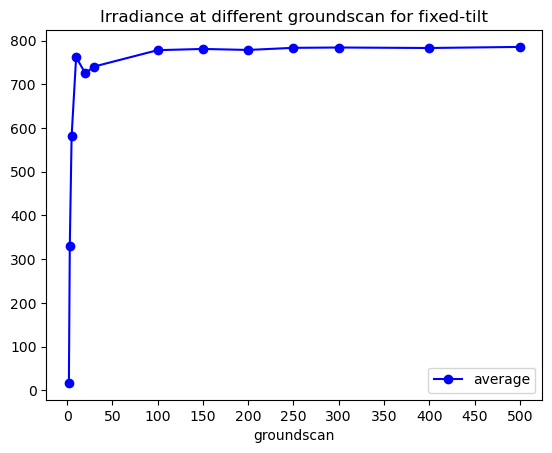

In [17]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()